# **Random Forest Algortm**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

#Traning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

## Import Data

In [2]:
df = pd.read_csv("../data/house_price.csv", index_col="ID")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


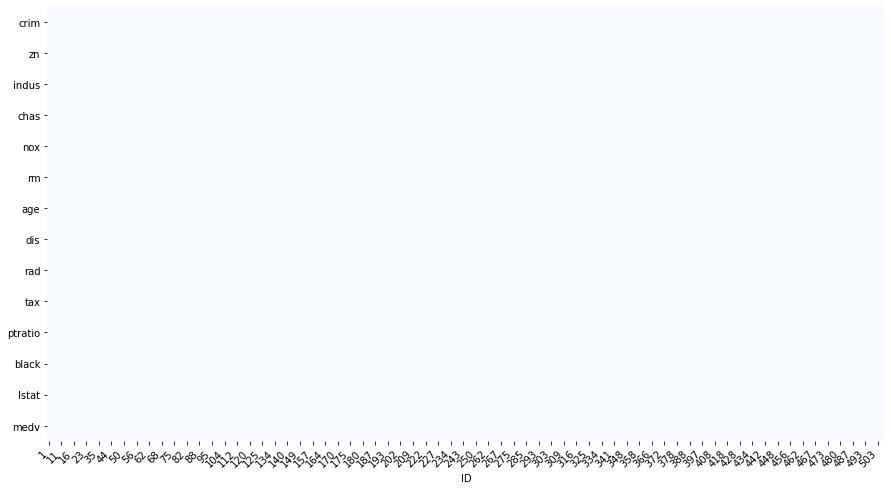

In [3]:
plot_missing_value(df)

## Split Data

In [4]:
X = df.drop(columns=["medv"])
y = df["medv"]

#karna kita prediksi regresi bukan clasifikasi maka data splitnya suffle split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## Traning

In [5]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [6]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

- n estimator = berapa banyak pohon yang ingin dibuat
- max depth brp banyak dicions yang mw di buat
- max features brp banyak pembagian data terhadap target, karna realita data x terhadap y sangat banyak
- berapa banyak batas daun/percabangan yang ingin di buat

In [7]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(),['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 
                            'rad', 'tax', 'ptratio', 'black', 'lstat']),
    ("categoric",cat_pipe(), ['chas'])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", RandomForestRegressor(n_jobs=-1, random_state=42))
])

#Tuning
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 80, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9796825791444227 0.9131952055120968 0.8423714770450016


## Scaling bisa membantu SVM Dan KNN tetapi RAW Tidak

Karna Scaling tidak mempengaruhi algoritma berbasis pohon. tapi RF bisa melakukan feature Importance

## Feature Importance

### **Mean Loss Decrease**
Kita akan melihat rata rata pengurangan eoror(loss) yang di kontribusikan oleh tiap fitur<br>
Untuk kasus klasifikasi, loss yang dipakai adalah```gini Impurity```,jadi sering disebut juga ```mean Impurity decrease```<br>
Untuk kasus regresi, loss yang dipakai adalah MSE, mungkin bisa disebut ```mean MSE decrease```? <br>
boleh di cek tool tip dari random forest, loss yang di masukkan adalah ```criterion``` <br><br>
```Semakin besar loss yang berhasil di turunkan oleh suatu fitur maka semakin penting fitur tersebut```

In [8]:
from jcopml.feature_importance import mean_loss_decrease

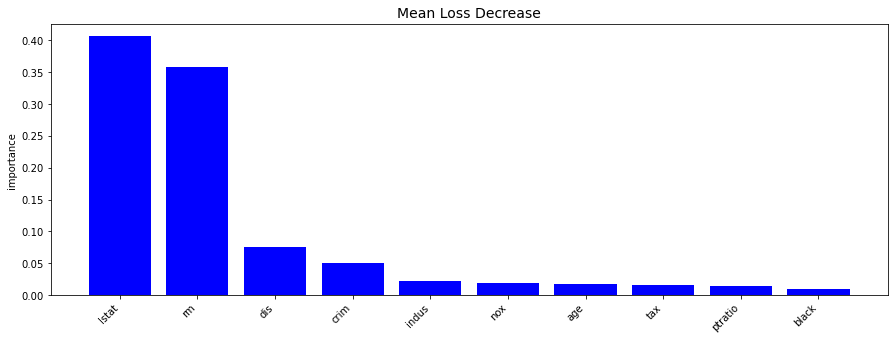

In [9]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=10)

### **Mean Score Decrease** 
model agnostik(moel apapun bisa baik tree atau pun svm) <br>
```Kita acak beberapa variabel dan liat beberapa pengurangan score yang terjadi. Semakin besar penurunan score artinya fitur semakin penting ```

In [10]:
from jcopml.feature_importance import mean_score_decrease

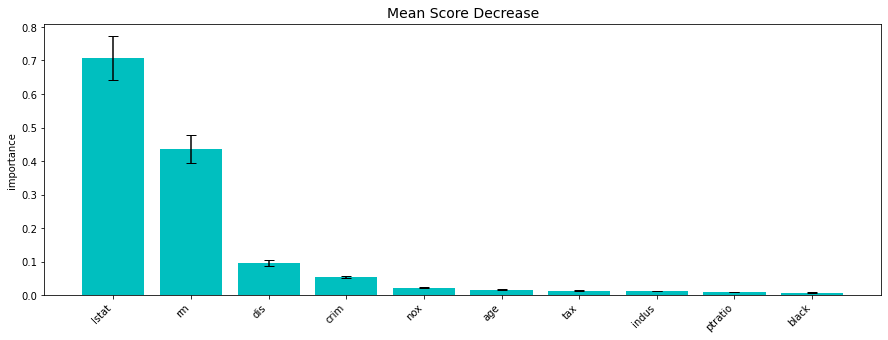

In [11]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# **4 Fasa Work Flow Mechine Learning**
1) Think Simple
2) Feature Importance
3) Poly 
4) Fine Tuning
5) EDA ekstensice

# **Fase 1**

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

#Traning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

# Import Data

In [3]:
df = pd.read_csv("../data/mobile.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


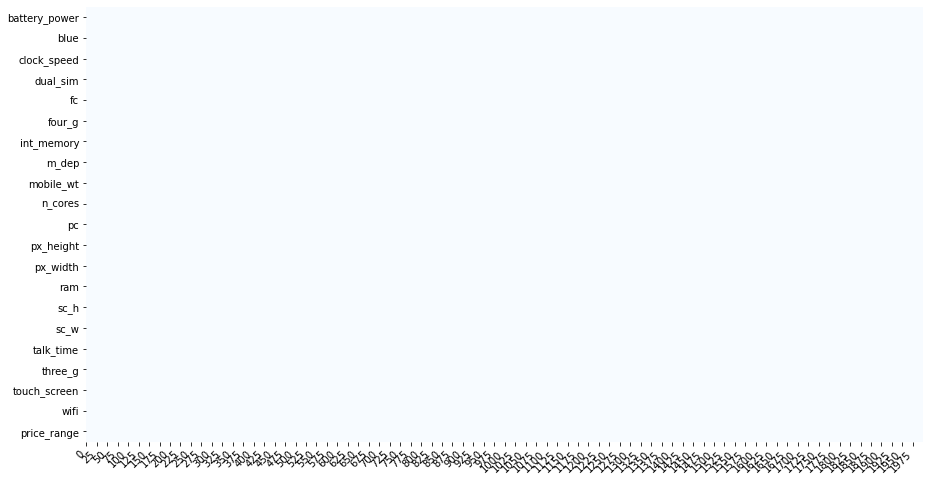

In [4]:
plot_missing_value(df)

# Data Split

In [7]:
X = df.drop(columns=["price_range"])
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

# Training

In [ ]:
#cek data imbalance
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [13]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
469,1845,1,0.5,1,10,0,61,0.3,96,1,12,292,695,1731,9,5,6,0,0,0
565,1271,1,0.5,0,12,0,32,0.1,113,7,15,1350,1949,445,15,14,14,0,0,1
396,788,0,2.5,1,4,1,57,0.9,91,8,12,42,1161,3969,12,8,6,1,1,1
452,1406,0,0.5,1,2,1,34,0.8,98,3,5,1017,1366,3915,9,8,2,1,0,1
325,920,0,2.1,1,5,0,25,0.4,115,7,14,209,1078,785,10,7,5,0,1,1


In [14]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(),["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores",
                           "pc","px_height","px_width", "ram", "sc_h", "sc_w","talk_time"]),
    ("categoric",cat_pipe(), ["blue","dual_sim","four_g","three_g","touch_screen","wifi"])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", RandomForestClassifier(n_jobs=-1, random_state=42))
])

#Tuning
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
1.0 0.92 0.8850018621188805


# **Fase 2**

In [15]:
from jcopml.feature_importance import mean_score_decrease

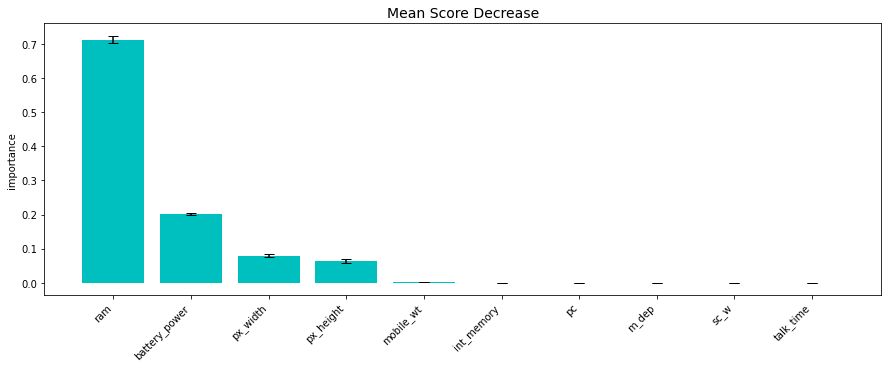

In [16]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# **Fase 3**

In [17]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(poly=2),["battery_power","ram","px_height","px_width",])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", RandomForestClassifier(n_jobs=-1, random_state=42))
])

#Tuning
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 100}
1.0 0.9475 0.921877671672136


# Fase 4

Kita memakai RandomSearch tidak lagi GridSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [19]:
rsp.rf_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [20]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(poly=2),["battery_power","ram","px_height","px_width",])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", RandomForestClassifier(n_jobs=-1, random_state=42))
])

#Tuning
model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 78, 'algo__max_features': 0.26786665935986886, 'algo__min_samples_leaf': 3, 'algo__n_estimators': 119, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.995 0.95 0.933753071325009
